In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
import pandas as pd

In [3]:
df = pd.read_csv('Downloads\MagicTelescope-1.csv')
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
df.loc[:,'class'] = en.transform(df['class'])
names = df['class']
data = df.drop('class', axis = 'columns')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, names,random_state=1, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)

In [7]:
y_pred=clf.predict(X_testscaled)

In [8]:
print('Accuracy score: ',clf.score(X_testscaled, y_test))

Accuracy score:  0.8606729758149316


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2499
           1       0.81      0.78      0.79      1305

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [12]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ', confusion)

Confusion matrix:  [[2256  243]
 [ 287 1018]]


<AxesSubplot:>

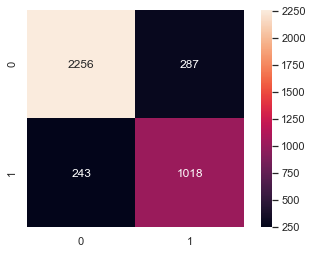

In [13]:
import seaborn as sns; sns.set()
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=True)

ROC 0.8414188663971336


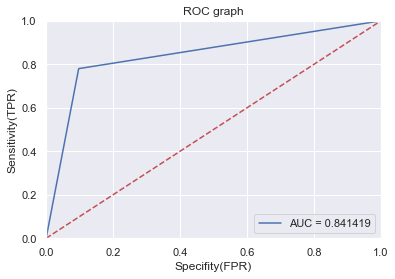

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.6f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [16]:
TP = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TN = confusion[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)

In [17]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.8871411718442784
FPR 0.19270420301348137
